In [1]:
from snooker.controls import SnookerControls, GridControls
from snooker.strike import BaseStrike

from pymatgen.core import Molecule
from pymatgen.io.ase import AseAtomsAdaptor
import nglview as nv

## Set up controls

In [2]:
g_ctrl = GridControls(
    grid_shape="fused_sphere",
    grid_type="random",
    radius=3.0,
    n_points=20,
)

controls = SnookerControls(
    target="../data_molecules/BzCl.xyz",
    grid=g_ctrl,
)
controls

SnookerControls(target=PosixPath('../data_molecules/BzCl.xyz'), ball=<Ball.hydroxyl: 'OH'>, ball_path=None, rotate_ball=True, results='results', seed=-1, software=Software(kind=<ImplementedSoftware.lammps: 'lammps'>, executable='lmp_serial', args=''), grid=GridControls(grid_shape=<GridShape.fused_sphere: 'fused_sphere'>, grid_type=<GridType.random: 'random'>, radius=3.0, n_points=20), box_size=15.0, temperature=300.0, target_temperature=300.0, ball_temperature=300.0, n_step=30000, ffield='')

In [3]:
controls.grid

GridControls(grid_shape=<GridShape.fused_sphere: 'fused_sphere'>, grid_type=<GridType.random: 'random'>, radius=3.0, n_points=20)

In [4]:
run = BaseStrike(controls)

## Look at the grid

In [5]:
run.export_grid(xyz=True, filename="grid.xyz")
run.grid.shape

(54, 3)

In [6]:
!head grid.xyz

54
H54
H 4.840552 1.284411 -0.037707
H 2.887392 -2.668372 1.141532
H 1.427378 -2.642558 1.233760
H 3.911426 2.206426 -0.978583
H 4.191092 0.443437 2.134481
H 4.465789 -1.872155 0.184090
H 3.431689 2.682940 -0.330072
H 3.522309 2.489160 -0.930545


In [7]:
s_target = nv.ASEStructure(AseAtomsAdaptor().get_atoms(run.target))

m_grid = Molecule.from_file("grid.xyz")
s_grid = nv.ASEStructure(AseAtomsAdaptor().get_atoms(m_grid))

view = nv.NGLWidget(s_target)
view.add_structure(s_grid)
view

NGLWidget()

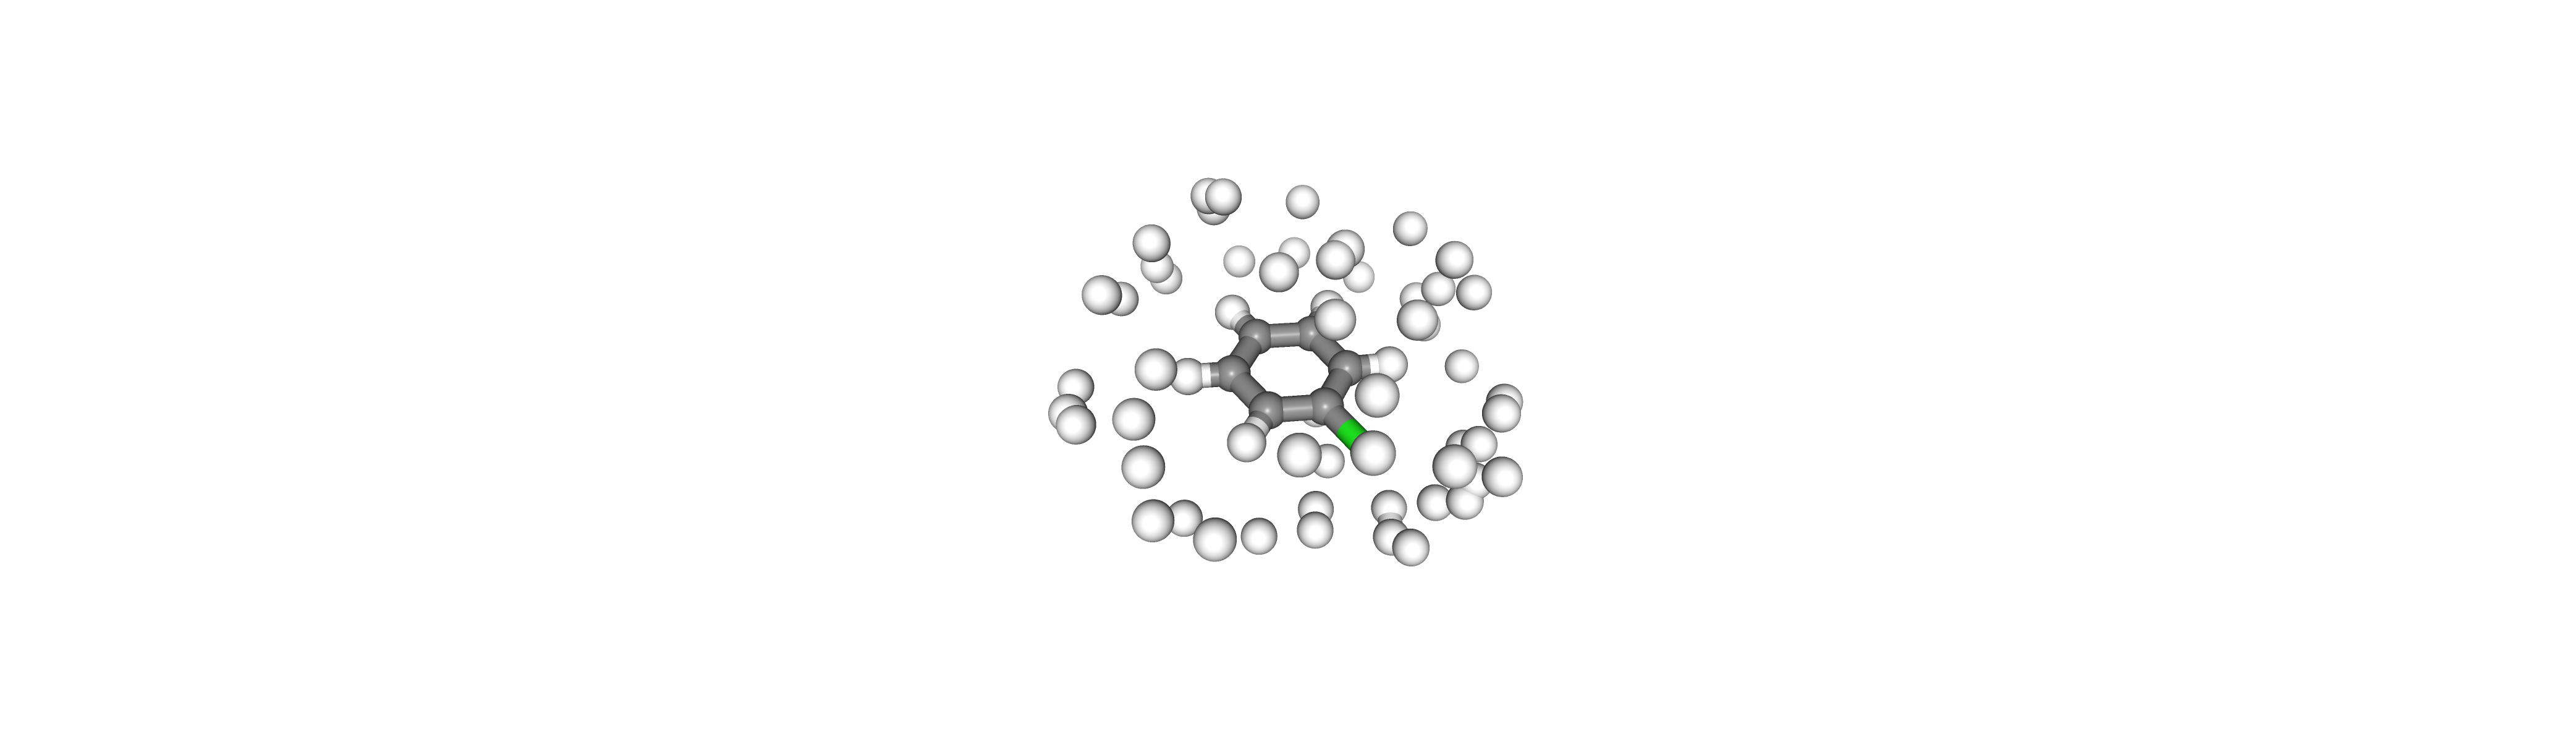

In [22]:
# view.render_image()
view._display_image()

## Produce files

This produces all files. Look at the number of grid points !!

In [9]:
run.output(fmt="xyz")
# run.output(fmt="g03")

In [10]:
from pathlib import Path
from pymatgen.io.gaussian import GaussianInput

path = Path("./com/")
path.mkdir(parents=True, exist_ok=True)   ## Warning !!

for i, (pts, mol) in enumerate(run, 1):
    name = f"mol{i:03d}"
    print(name, pts)
    
    ginp = GaussianInput(
        mol, charge=0, spin_multiplicity=1,
        functional="B3LYP", basis_set="6-31+G(d, p)",
        route_parameters={"SCF":"Tight", "opt": "(tight, ModRedundant)"},
        link0_parameters={"%nprocs": "4", "%chk": name + ".chk"}
    )
    ginp.write_file(path / (name + ".com"), cart_coords=True)

mol001 [ 4.84055239  1.28441071 -0.03770667]
mol002 [ 2.88739231 -2.66837165  1.14153186]
mol003 [ 1.42737821 -2.6425582   1.23375964]
mol004 [ 3.91142579  2.20642646 -0.97858306]
mol005 [4.1910916  0.44343738 2.13448122]
mol006 [ 4.46578906 -1.87215499  0.18409007]
mol007 [ 3.43168903  2.68294017 -0.33007169]
mol008 [ 3.52230939  2.4891599  -0.93054452]
mol009 [ 3.684704   -1.72605226 -1.89654686]
mol010 [ 2.46335936 -2.30689527 -1.88709893]
mol011 [-0.72395231  2.7597188   0.10323288]
mol012 [-2.111658    2.92555904  0.726005  ]
mol013 [-1.03604778  2.88206793  0.67256628]
mol014 [-0.99038686 -2.89991987  0.83644028]
mol015 [-1.91077011 -2.99151594 -1.273906  ]
mol016 [ 0.6128591   2.88304021 -1.28962984]
mol017 [ 0.34776052 -2.93252223 -1.44227691]
mol018 [-0.49244653 -2.93721973 -0.65600268]
mol019 [ 2.39088085 -2.13977913  2.25207777]
mol020 [ 2.59705027 -0.70735168  3.93189974]
mol021 [ 2.46751651 -1.7014436   3.31725289]
mol022 [0.37576917 0.07659561 5.14569087]
mol023 [-0.63293

## Custum ball molecule

In [11]:
g_ctrl = GridControls(
    grid_shape="fused_sphere",
    grid_type="random",
    radius=5.0,
    n_points=20,
)

controls = SnookerControls(
    target="../data_molecules/woc.xyz",
    ball="custom",
    ball_path="../data_molecules/BzCl.xyz",
    grid=g_ctrl,
)
controls

SnookerControls(target=PosixPath('../data_molecules/woc.xyz'), ball=<Ball.custom: 'custom'>, ball_path=PosixPath('../data_molecules/BzCl.xyz'), rotate_ball=True, results='results', seed=-1, software=Software(kind=<ImplementedSoftware.lammps: 'lammps'>, executable='lmp_serial', args=''), grid=GridControls(grid_shape=<GridShape.fused_sphere: 'fused_sphere'>, grid_type=<GridType.random: 'random'>, radius=5.0, n_points=20), box_size=15.0, temperature=300.0, target_temperature=300.0, ball_temperature=300.0, n_step=30000, ffield='')

In [12]:
run = BaseStrike(controls)

In [13]:
point, molecule = run[12]

In [14]:
view = nv.show_pymatgen(molecule)
view

NGLWidget()

In [15]:
print(molecule)

Full Formula (Cu1 H19 C25 N4 Cl1 O4)
Reduced Formula: CuH19C25N4ClO4
Charge = 0, Spin Mult = 2
Sites (54)
0 Cu    -0.000004    -0.198934     0.059210
1 O     1.436607    -3.860484     0.287802
2 O    -1.436427    -3.860626     0.287012
3 O    -2.204516     3.066246    -0.654782
4 O     2.204470     3.066296    -0.654811
5 N    -1.257821    -1.548360     0.119774
6 N    -1.443726     0.978819    -0.081403
7 N     1.443700     0.978836    -0.081456
8 N     1.257876    -1.548294     0.119934
9 C     0.767461    -2.833752     0.223576
10 C    -0.767378    -2.833797     0.223271
11 C    -2.559980    -1.115135    -0.023725
12 C    -3.701267    -1.939483    -0.054178
13 C    -4.945988    -1.344415    -0.197730
14 C    -5.065151     0.053735    -0.308248
15 C    -3.950184     0.883089    -0.288096
16 C    -2.669405     0.309854    -0.150533
17 C    -1.302968     2.355182    -0.208698
18 C    -0.000015     2.982839     0.334561
19 C     1.302889     2.355192    -0.208707
20 C     2.669391     0